In [1]:
import numpy as np
import scipy
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import csv
from scipy.optimize import linprog
from scipy.linalg import cho_factor, cho_solve
from scipy import sparse
import time

In [2]:
m = 50
n = 100

In [3]:
A = np.eye(m, n)
for i in range(m+1, n):
    A[i%m][i] = 1
A = A[0:m, :]
for i in range(0, m):
    for j in range(0, n):
        if A[i][j] > 0:
            A[i][j] = A[i][j]*np.random.rand()
        else:
            if (np.random.rand() > 0.995):
                A[i][j] = np.random.rand()
#print(A)

In [4]:
print(np.linalg.matrix_rank(A))

50


In [5]:
c = np.random.rand(n, 1)
x = np.random.rand(n, 1)
b = np.dot(A, x)
print(np.shape(b))

(50, 1)


In [17]:
At = np.transpose(A)
AAt = np.dot(A, At)
x = np.dot(np.linalg.inv(AAt), b)
x = np.dot(At, x)
y = np.dot(A, c)
y = np.dot(np.linalg.inv(AAt),(y))
s = c - np.dot(At, y)
deltax = max(-1.5*min(x), 0)
deltas = max(-1.5*min(s), 0)

deltaxx = deltax + 0.5*(np.dot(np.transpose(x + deltax), (s + deltas)))/(np.sum(s + deltas))
deltass = deltas + 0.5*(np.dot(np.transpose(x + deltax), (s + deltas)))/(np.sum(x + deltax))
x = x + deltaxx
s = s + deltass

print(min(x), min(s))

[0.24792692] [0.52101151]


In [18]:
np.savetxt("B_random.csv", b, delimiter = " ")
np.savetxt("C_random.csv", c, delimiter = " ")
np.savetxt("x_random.csv", x, delimiter = " ")
np.savetxt("y_random.csv", y, delimiter = " ")
np.savetxt("s_random.csv", s, delimiter = " ")

In [19]:
def sparsify(A):
    nnz = 0
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    ia = np.ones(m + 1)
    val = []
    ja = []
    for i in range(0, m):
        for j in range(0, n):
            if A[i][j] != 0:
                val.append(A[i][j])
                ja.append(j + 1)
                nnz = nnz + 1
        ia[i + 1] = nnz + 1
    ia = ia.astype(int)
    ja = np.array(ja)
    ja = ja.astype(int)
    return val, ja, ia 

In [20]:
va, ja, ia = sparsify(A)
csvfile = "A_random.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [21]:
va, ja, ia = sparsify(At)
csvfile = "At_random.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [22]:
start = time.time()
# for i in range(0, 4):
result = linprog(c, A_eq = A, b_eq=b, method='interior-point')
end = time.time()
print("time taken = ", end - start)

time taken =  0.01497793197631836


In [12]:
print(result)

     con: array([-1.26855193e-11, -5.26245714e-12, -2.21527241e-11, -4.99711383e-12,
       -8.14903700e-13, -1.12959642e-11, -1.51293145e-11, -1.27475808e-12,
       -1.42120760e-11, -1.11696763e-11, -1.95413685e-11, -4.40814052e-12,
       -2.38656317e-11, -1.09630083e-11, -9.21440702e-12, -1.60251812e-11,
       -3.77875509e-12, -9.37566691e-12, -6.30961949e-12, -1.39837031e-11,
       -8.68582983e-12, -2.40374387e-12, -1.58760782e-11, -5.95790084e-12,
       -1.22144517e-11, -5.86786175e-12, -3.00515168e-12, -1.14957488e-11,
       -7.01472214e-12, -8.28070945e-12, -1.47282186e-11, -3.85413923e-12,
       -1.95838346e-11, -8.47422132e-12, -1.15223386e-11, -6.01163563e-12,
       -1.75603976e-11, -1.34027234e-11, -7.79021292e-12, -1.89842586e-11,
       -9.33481070e-12, -1.48100421e-11, -7.74891262e-12, -1.87346805e-11,
       -2.75479639e-12, -1.61987090e-11, -1.47319934e-11, -6.44057030e-12,
       -1.26847421e-11, -1.01252340e-13])
     fun: 16.23909368795697
 message: 'Optimizat

In [24]:
print(np.count_nonzero(A))
print(np.count_nonzero(AAt))

120
92


In [14]:
va, ja, ia = sparsify(AAt)
csvfile = "AAt_random.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [15]:
print(np.linalg.matrix_rank(AAt))

50


In [16]:
print(np.count_nonzero(AAt)/(m*m))

0.0368


In [141]:
#(m*n-nnzAAt)
# (500*1000-11000) (200*500 - 1620) ()
size = ["500*1000", "500*1000", "200*500", "200*500", "100*200", "100*200", "50*100",  "50*100", "10*20", "10*20"]
time_1000_gpu = [68.556, 3.317, 0.783, 0.308, 0.302]
time_1000_cpu = [237.8, 19.33, 9.127, 4.89, 3.29]

<BarContainer object of 5 artists>

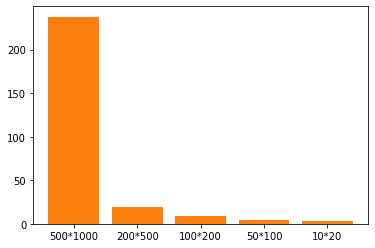

In [143]:
plt.bar(size, time_1000_gpu)
plt.bar(size, time_1000_cpu)